# 붓꽃(Iris) 데이터 분류 
- 머신러닝 모델
- 딥러닝 모델 사용

## 1. 라이브러리 설정하기

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib as mpl

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
#plt.style.use("fivethirtyeight")
plt.style.use("classic")

In [2]:
import numpy as np
import pandas as pd
import sklearn

In [5]:
import sys
import time

In [6]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers

In [7]:
print("python", sys.version)
for module in mpl, np, pd, sklearn, tf, keras, sns:
    print(module.__name__, module.__version__)

python 3.8.0 | packaged by conda-forge | (default, Nov 22 2019, 19:04:36) [MSC v.1916 64 bit (AMD64)]
matplotlib 3.4.3
numpy 1.19.5
pandas 1.3.4
sklearn 1.0
tensorflow 2.5.0
tensorflow.keras 2.5.0
seaborn 0.11.2


In [8]:
%matplotlib inline

In [9]:
from sklearn.model_selection import learning_curve, train_test_split,KFold,  ShuffleSplit

In [10]:
def plot_ml_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 20)):   
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    #plt.legend(loc="best")
    plt.legend(loc='lower right')
    return plt

## 2. 데이터 가져오기 
- 판다스를 이용하여 iris 데이터 가져오기

In [3]:
df = pd.read_csv('./Iris.csv', encoding='UTF8')
df.shape

(150, 6)

In [13]:
df.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [15]:
df.isna().any()

Id               False
SepalLengthCm    False
SepalWidthCm     False
PetalLengthCm    False
PetalWidthCm     False
Species          False
dtype: bool

In [16]:
df.shape

(150, 6)

** 라벨을 위해 Species의 텍스트는 범주형 혹은 숫자로 인코딩 해야한다

## 3. 데이터 가시화 

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

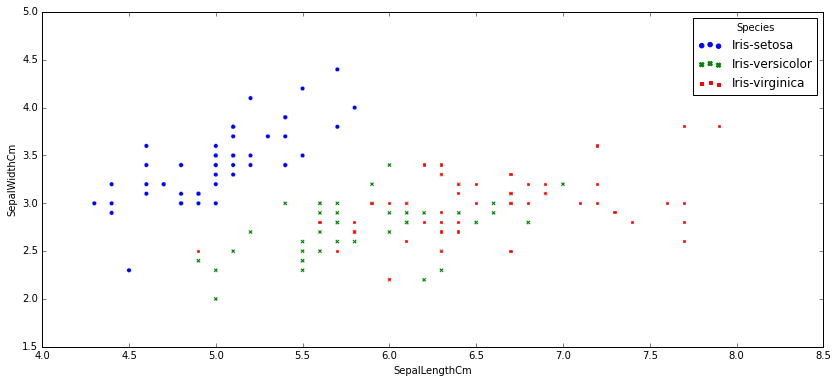

In [17]:
import seaborn as sns
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x = 'SepalLengthCm', y = 'SepalWidthCm', hue='Species', style='Species')

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

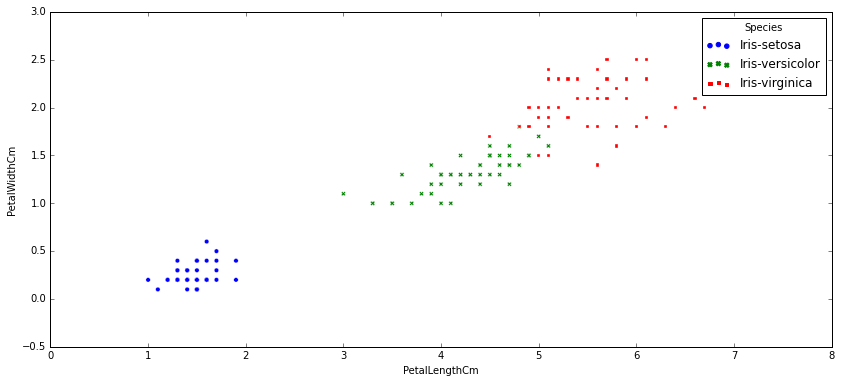

In [18]:
plt.figure(figsize=(14,6))
sns.scatterplot(data=df, x = 'PetalLengthCm', y = 'PetalWidthCm', hue='Species', style='Species')


In [19]:
df.drop('Id',axis=1,inplace=True)

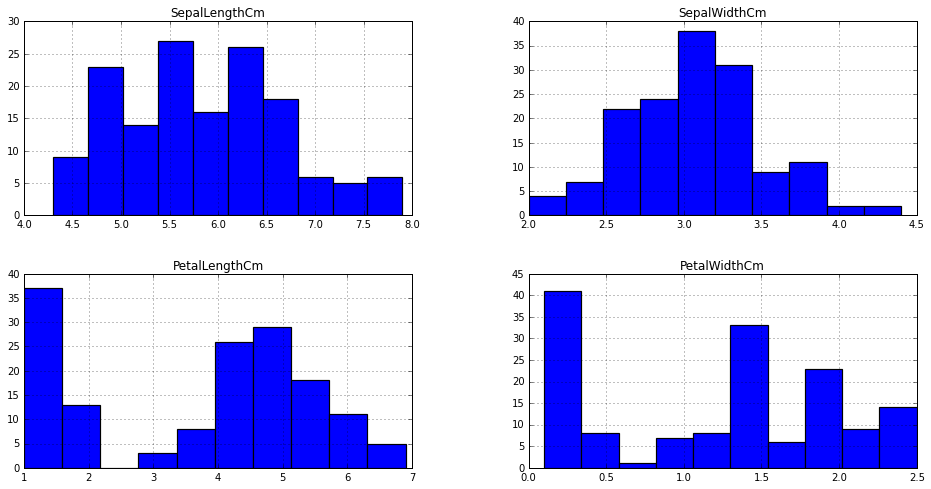

In [20]:
df.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(16,8)
plt.show()

<AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>

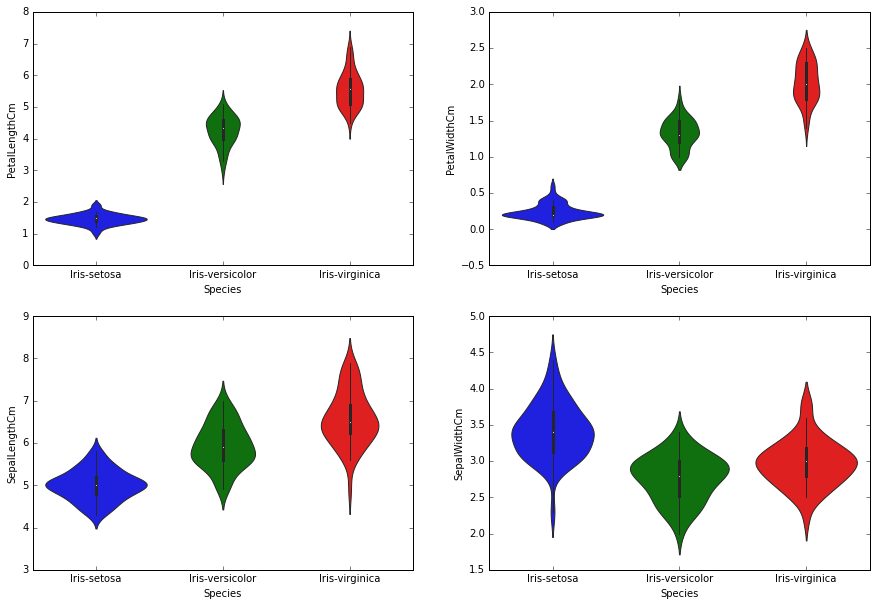

In [21]:
plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

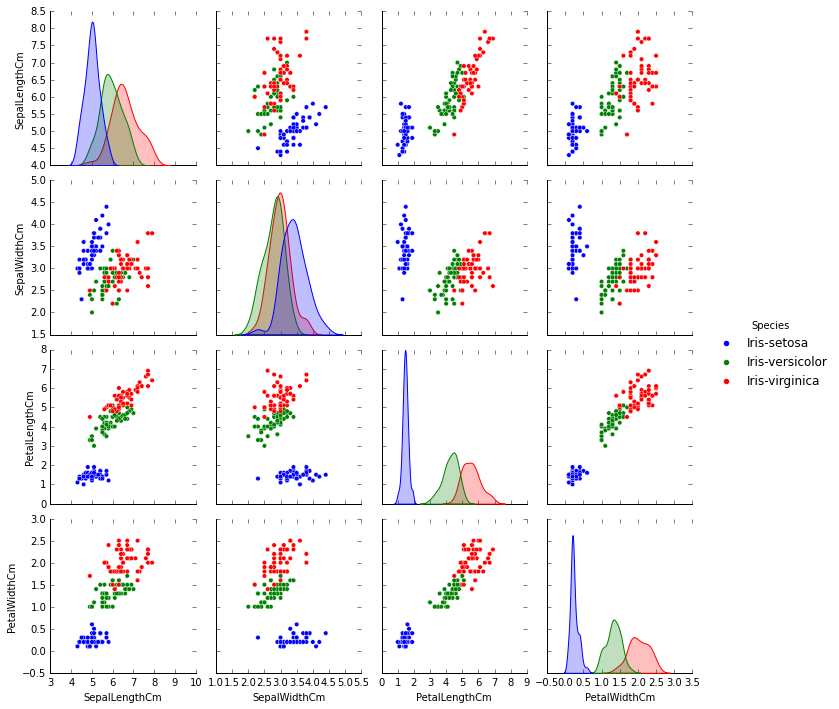

In [22]:
sns.pairplot(df,hue='Species')

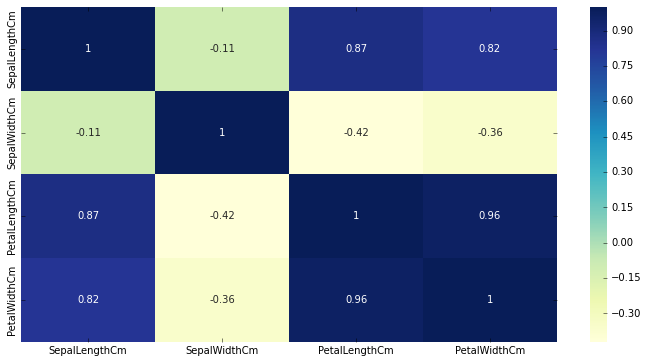

In [23]:
plt.figure(figsize=(12,6)) 
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

## 4 머신러닝을 위한 입력 데이터 만들자

### 1) 입력 X와 출력 y의 값을 정하기

In [24]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [25]:
df['Species'] = df['Species'].str[5:]
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [26]:
feature_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
target_col = 'Species'
X = df[feature_cols]
y = df[target_col]

X = df.drop(['Species','Id'], axis=1)

In [27]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


y = df['Species']

In [28]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: Species, dtype: object

### 2) 출력용 라벨을 머신러닝용을 다루자

- 타켓의 텍스트를 숫자로 바꾸자 

In [29]:
class_dic = {'setosa':0, 'versicolor':1, 'virginica':2}
y_ohc = y.apply(lambda z: class_dic[z])

In [30]:
y_ohc.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int64

### 3) 데이터를 훈련과 테스트로 나누자 
- (실전) 데이터를 validation을 포함해서 나눌수 있다.
- (해보기) 전체 데이터를 train : validation : test = 0.6: 0.2: 0.2 로 나누어라

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_ohc, test_size=0.20, random_state=30)

In [32]:
print(X_train.shape, y_train.shape)
print(X_test.shape,  y_test.shape)

(120, 4) (120,)
(30, 4) (30,)


In [33]:
import sklearn
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. 머신러닝 모델을 만들자

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression  
from sklearn import metrics         

In [36]:
from sklearn.model_selection import ShuffleSplit

### 0) 머신러닝 훈련과정을 그려보자

### 1) 로지스틱 회귀

In [37]:
m_lr = LogisticRegression()
m_lr.fit(X_train,y_train)

LogisticRegression()

In [38]:
pred = m_lr.predict(X_test)

acc_lr = metrics.accuracy_score(pred,y_test)
print('The accuracy of the Logistic Regression is', acc_lr)

The accuracy of the Logistic Regression is 0.9333333333333333


In [39]:
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\anaconda3\\envs\\tf2-cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

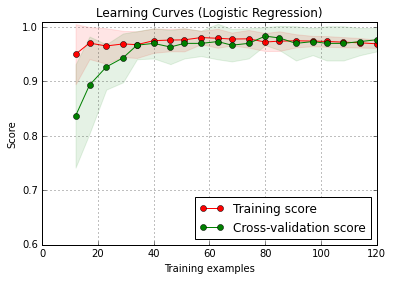

In [40]:
#import myUtil as myutil
plot_ml_curve(m_lr, title, X, y, ylim=(0.6, 1.01), cv=cv)

### 2 Support Vector Machine (SVM)

In [41]:
sv = svm.SVC() 
sv.fit(X_train,y_train) 
pred = sv.predict(X_test)
acc_svm = metrics.accuracy_score(pred,y_test)
print('The accuracy of the SVM is:', acc_svm)

The accuracy of the SVM is: 0.9666666666666667


Wall time: 853 ms


<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\anaconda3\\envs\\tf2-cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

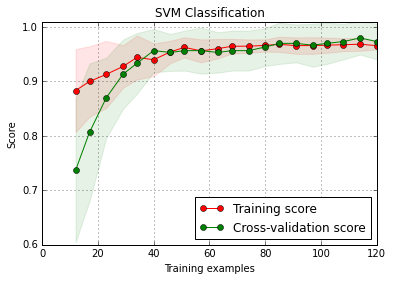

In [42]:
%%time
title = "SVM Classification"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_ml_curve(sv, title, X, y, ylim=(0.6, 1.01), cv=cv )

### 3 K-Nearest Neighbours

In [43]:
knc = KNeighborsClassifier(n_neighbors=6)
knc.fit(X_train,y_train)
pred = knc.predict(X_test)
acc_knn = metrics.accuracy_score(pred,y_test)
print('The accuracy of the KNN is', acc_knn)

The accuracy of the KNN is 0.9666666666666667


<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\anaconda3\\envs\\tf2-cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

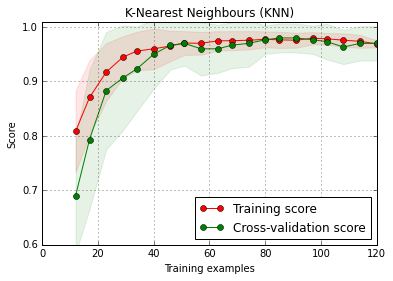

In [44]:
title = "K-Nearest Neighbours (KNN)"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_ml_curve(knc, title, X, y, ylim=(0.6, 1.01), cv=cv, n_jobs=4)

#### 3.1 최적의 k-NN의 정확도 확인 

([<matplotlib.axis.XTick at 0x1a48beed250>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

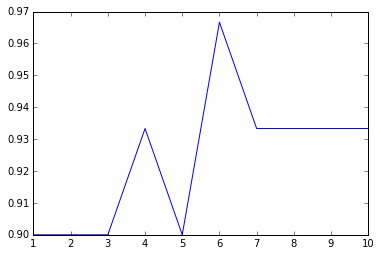

In [45]:
a_index = list(range(1,11))
a = pd.Series()
x = [1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    kcs = KNeighborsClassifier(n_neighbors=i) 
    kcs.fit(X_train,y_train)
    y_pred = kcs.predict(X_test)
    a=a.append(pd.Series(metrics.accuracy_score(y_pred,y_test)))
    
plt.plot(a_index, a)
plt.xticks(x)

### 4 램덤포레스트 (RandomForestClassifier)

In [46]:
m_rf = RandomForestClassifier(n_estimators=100, max_depth = 3)

In [47]:
m_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3)

In [48]:
pred = m_rf.predict(X_test)

In [49]:
acc_rf = metrics.accuracy_score(pred,y_test)
print('The accuracy of the SVM is:', acc_rf)

The accuracy of the SVM is: 0.9333333333333333


<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\anaconda3\\envs\\tf2-cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

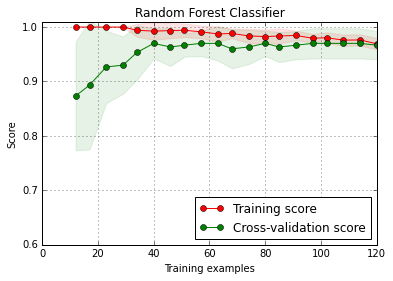

In [50]:
title = "Random Forest Classifier"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plot_ml_curve(m_rf, title, X, y, ylim=(0.6, 1.01), cv=cv)

### 5 의사결정나무 (DecisionTreeClassifier)

In [51]:
m_tree = DecisionTreeClassifier()

m_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
prd = m_tree.predict(X_test)

In [53]:
acc_dt = metrics.accuracy_score(pred,y_test)
print('The accuracy of the SVM is:', acc_dt)

The accuracy of the SVM is: 0.9333333333333333


<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\anaconda3\\envs\\tf2-cpu\\lib\\site-packages\\matplotlib\\pyplot.py'>

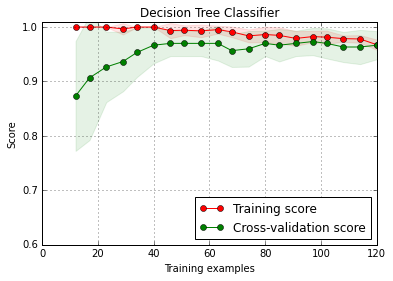

In [54]:
title = "Decision Tree Classifier"
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

plot_ml_curve(m_rf, title, X, y, ylim=(0.6, 1.01), cv=cv)

### 6. 딥러닝 

- 데이터의 범위를 [0,1] 사이로 스케일 
- 사이킷런의 MinMaxScaler()

In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_ohc, test_size=0.2,random_state=20)

In [57]:
X_train.shape

(120, 4)

In [58]:
model = keras.Sequential([
    keras.layers.Dense(64, activation = 'relu', input_shape=[4]),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(3, activation = 'softmax')
])

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                320       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 51        
Total params: 2,979
Trainable params: 2,979
Non-trainable params: 0
_________________________________________________________________


In [59]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 16, verbose=2)            

Epoch 1/200
8/8 - 0s - loss: 1.0972 - accuracy: 0.3250
Epoch 2/200
8/8 - 0s - loss: 1.0503 - accuracy: 0.4417
Epoch 3/200
8/8 - 0s - loss: 1.0046 - accuracy: 0.6667
Epoch 4/200
8/8 - 0s - loss: 0.9622 - accuracy: 0.6750
Epoch 5/200
8/8 - 0s - loss: 0.9235 - accuracy: 0.6750
Epoch 6/200
8/8 - 0s - loss: 0.8764 - accuracy: 0.6750
Epoch 7/200
8/8 - 0s - loss: 0.8268 - accuracy: 0.6750
Epoch 8/200
8/8 - 0s - loss: 0.7728 - accuracy: 0.6750
Epoch 9/200
8/8 - 0s - loss: 0.7179 - accuracy: 0.6750
Epoch 10/200
8/8 - 0s - loss: 0.6647 - accuracy: 0.6750
Epoch 11/200
8/8 - 0s - loss: 0.6149 - accuracy: 0.6750
Epoch 12/200
8/8 - 0s - loss: 0.5696 - accuracy: 0.6750
Epoch 13/200
8/8 - 0s - loss: 0.5284 - accuracy: 0.6750
Epoch 14/200
8/8 - 0s - loss: 0.4925 - accuracy: 0.6750
Epoch 15/200
8/8 - 0s - loss: 0.4603 - accuracy: 0.6917
Epoch 16/200
8/8 - 0s - loss: 0.4330 - accuracy: 0.7833
Epoch 17/200
8/8 - 0s - loss: 0.4064 - accuracy: 0.8750
Epoch 18/200
8/8 - 0s - loss: 0.3855 - accuracy: 0.8917
E

Epoch 147/200
8/8 - 0s - loss: 0.0385 - accuracy: 0.9917
Epoch 148/200
8/8 - 0s - loss: 0.0356 - accuracy: 0.9917
Epoch 149/200
8/8 - 0s - loss: 0.0381 - accuracy: 0.9750
Epoch 150/200
8/8 - 0s - loss: 0.0467 - accuracy: 0.9750
Epoch 151/200
8/8 - 0s - loss: 0.0501 - accuracy: 0.9667
Epoch 152/200
8/8 - 0s - loss: 0.0344 - accuracy: 0.9917
Epoch 153/200
8/8 - 0s - loss: 0.0378 - accuracy: 0.9833
Epoch 154/200
8/8 - 0s - loss: 0.0404 - accuracy: 0.9833
Epoch 155/200
8/8 - 0s - loss: 0.0336 - accuracy: 0.9833
Epoch 156/200
8/8 - 0s - loss: 0.0509 - accuracy: 0.9750
Epoch 157/200
8/8 - 0s - loss: 0.0363 - accuracy: 0.9833
Epoch 158/200
8/8 - 0s - loss: 0.0399 - accuracy: 0.9750
Epoch 159/200
8/8 - 0s - loss: 0.0441 - accuracy: 0.9750
Epoch 160/200
8/8 - 0s - loss: 0.0420 - accuracy: 0.9833
Epoch 161/200
8/8 - 0s - loss: 0.0400 - accuracy: 0.9833
Epoch 162/200
8/8 - 0s - loss: 0.0354 - accuracy: 0.9917
Epoch 163/200
8/8 - 0s - loss: 0.0419 - accuracy: 0.9833
Epoch 164/200
8/8 - 0s - loss: 

In [60]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 113ms/step - loss: 0.0943 - accuracy: 0.9667


[0.0943390429019928, 0.9666666388511658]

In [61]:
acc_dnn = history.history['accuracy'][np.argmin(history.history['loss'])]
print('The accuracy of the Deep Learning is:', acc_dnn)

The accuracy of the Deep Learning is: 0.9916666746139526


In [63]:

def plot_history(history):
    loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' not in s]
    val_loss_list = [s for s in history.history.keys() if 'loss' in s and 'val' in s]
    acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' not in s]
    val_acc_list = [s for s in history.history.keys() if 'acc' in s and 'val' in s]
    
    if len(loss_list) == 0:
        print('Loss is missing in history')
        return 
    
    ## As loss always exists
    epochs = range(1,len(history.history[loss_list[0]]) + 1)
    
    ## Loss
    plt.figure(1)
    for l in loss_list:
        plt.plot(epochs, history.history[l], 'r', label='Training loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    for l in val_loss_list:
        plt.plot(epochs, history.history[l], 'b', label='Validation loss (' + str(str(format(history.history[l][-1],'.5f'))+')'))
    
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    ## Accuracy
    plt.figure(2)
    for l in acc_list:
        plt.plot(epochs, history.history[l], 'r', label='Training accuracy (' + str(format(history.history[l][-1],'.5f'))+')')
    for l in val_acc_list:    
        plt.plot(epochs, history.history[l], 'b', label='Validation accuracy (' + str(format(history.history[l][-1],'.5f'))+')')

    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()
    

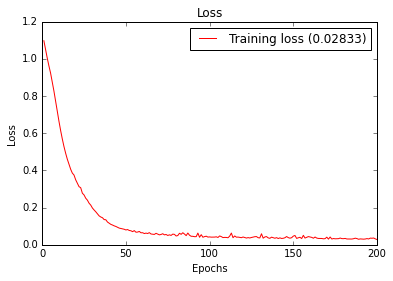

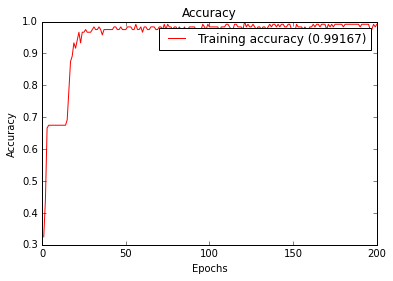

In [64]:
plot_history(history)

In [65]:
models = pd.DataFrame({
    'Model': ['Logistic Regression',  'Support Vector Machines','RandomForest',
              'K-Nearest Neighbours', 'Decision Tree','Deep Learning'],
    'Score': [acc_lr, acc_svm, acc_rf, acc_knn, acc_dt, acc_dnn]})
models.sort_values(by='Score', ascending=False)

,Model,Score
5,Deep Learning,0.991667
1,Support Vector Machines,0.966667
3,K-Nearest Neighbours,0.966667
0,Logistic Regression,0.933333
2,RandomForest,0.933333
4,Decision Tree,0.933333
